<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Machine Learning Introduction  

### Making a Variety of Machine Learning Models in Python 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### Multiple Machine Learning Models for Subsurface Modeling in Python 

Here's a simple workflow, demonstration of training multiple machine learning models with a single dataset.  

* This is provided as a fast comparison of general behavoir of these models

* There is no effort to tune the hyperparameters / test the models with withheld testing data

* Given the 2 predictor features and 1 response feature it is easy to visualize the data and the model

This provides an opportunity to run and visualize a variety of machine learning models for experiential learning.

#### Machine Learning-based Prediction

Predictive machine learning methods with supervised learning: 

**Prediction**

* non-parametric method for regression and classification

* a function $\hat{f}$ of the nearest $k$ training data in predictor feature space such that we predict a response feature $Y$ from a set of predictor features $X_1,\ldots,X_m$. 

* the prediction is of the form $\hat{Y} = \hat{f}(X_1,\ldots,X_m)$ 

**Suppervised Learning**

* the response feature label, $Y$, is available over the training and testing data

#### The Machine Learning Models

This workflow includes the following models:

* linear regression
* k-nearest neighbor regression
* decision tree regression
* random forest regression
* tree-based gradient boosting regression  

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

If you want to work locally you will need to first copy the data file to your working directory. It is available here:

* Tabular data - unconv_MV.csv found [here](https://github.com/GeostatsGuy/GeoDataSets/blob/master/unconv_MV.csv).

You don't have to download the data if you want to load directly from my github account with the code below.

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

In [14]:
import os                                                   # to set current working directory 
import math                                                 # basic calculations like square root
from sklearn.neighbors import KNeighborsRegressor           # for nearest k neighbours
from sklearn import metrics                                 # measures to check our models
from sklearn.model_selection import cross_val_score         # cross validation methods
import pandas as pd                                         # DataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                          # arrays and matrix math
import matplotlib.pyplot as plt                             # plotting
from subprocess import check_call
from sklearn.model_selection import train_test_split        # train and test split
cmap = plt.cm.inferno                                       # the most awesome color map

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a decision tree regression model. 

In [112]:
def visualize_model(model,xfeature,xtfeature,x_min,x_max,yfeature,ytfeature,y_min,y_max,response,tresponse,z_min,z_max,title,legend=True):# plots the data points and the decision tree prediction 
    n_classes = 10
    cmap = plt.cm.RdYlBu
    cmap = plt.cm.inferno
    plot_step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.clip(Z,z_min,z_max)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))

    im = plt.scatter(xfeature,yfeature,s=30, c=response, marker='o', cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, edgecolors="white", label='train')
    plt.scatter(xtfeature,ytfeature,s=50, c=tresponse, marker='*', cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, edgecolors="white", label='test')

    plt.title(title)
    plt.xlabel(xfeature.name)
    plt.ylabel(yfeature.name)
    if legend == True:
        cbar = plt.colorbar(im, orientation = 'vertical')
        cbar.set_label(response.name, rotation=270, labelpad=20)
    plt.legend(loc='upper left')
        
def visualize_model_sub(ax,model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,legend=True):# plots the data points and the decision tree prediction 
    n_classes = 10
    cmap = plt.cm.RdYlBu
    cmap = plt.cm.inferno
    plot_step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.clip(Z,z_min,z_max)
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))

    im = ax.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, edgecolors="white")
    ax.set_title(title)
    ax.set_xlabel(xfeature.name)
    ax.set_ylabel(yfeature.name)
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    if legend == True:
        cbar = plt.colorbar(im, orientation = 'vertical')
        cbar.set_label(response.name, rotation=270, labelpad=20)
        
def cross_validation_plot(model,X_train,X_test,vmin,vmax,feature,funits,model_name):

    pred_train = model.predict(X_train); pred_test = linear_fit.predict(X_test)

    plt.scatter(y_train['Prod'],pred_train,color='blue',edgecolor='black',s=15,label='train'); plt.plot([vmin,vmax],[vmin,vmax],color='black',ls='--'); plt.xlim([vmin,vmax]); plt.ylim([vmin,vmax])
    plt.scatter(y_test['Prod'],pred_test,color='yellow',edgecolor='black',s=15,label='test'); 
    plt.xlabel('Predicted ' + feature + ' (' + funits + ')'); plt.ylabel('Actual ' + feature + ' (' + funits + ')'); plt.title(model_name + ' Regression Actual vs Predicted')
    plt.legend(loc='upper left')

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).


In [3]:
#os.chdir("c:/PGE383")                                       # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Read the data table

We use a data "unconv_MV.csv" comma delimited file from my GitHub [respository](https://github.com/GeostatsGuy/GeoDataSets).  

* this code loads the data directly from my GitHub repository.
* if you have the data file available locally (i.e. you are not connected to the internet) set the working directory to the location with the data file and use the second line below

In [143]:
my_data = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv")   # load the comma delimited data file
#my_data = pd.read_csv("unconv_MV.csv")                     # load the comma delimited data file locally
my_data = my_data.sample(frac=0.2,replace=False)            # for ease of visualization reduce the number of data
my_data = my_data.reset_index().iloc[:,1:]
print('Working with ' + str(len(my_data)) + ' data.')
my_data['Production'] = my_data['Production'] + np.random.normal(loc=0,scale=800,size=len(my_data)) # add random error to response feature to increase prediction difficulty

Working with 200 data.


Let's visualize the first several rows of our data stored in a DataFrame so we can make sure we successfully loaded the data file.

In [126]:
my_data.head(n=3)                                            # preview the first n rows of the dataframe

,WellIndex,Por,LogPerm,AI,Brittle,TOC,VR,Production
0,773,15.32,1.51,3.95,50.51,0.26,2.11,2878.067910
1,340,21.01,2.12,3.05,13.10,1.94,2.08,-1352.169918
2,867,13.80,1.19,3.15,46.08,1.28,2.07,1758.551452


Let's remove the well index and check the summary summary statistics.

In [127]:
my_data = my_data.iloc[:,1:8]                               # copy all rows and columns 1 through 8, note 0 column is removed
my_data.describe().transpose()                              # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,200.0,15.076250,3.117517,5.400000,13.197500,15.410000,17.217500,23.310000
LogPerm,200.0,1.420800,0.413089,0.240000,1.147500,1.415000,1.712500,2.560000
AI,200.0,3.010600,0.552680,1.450000,2.627500,3.060000,3.380000,4.500000
Brittle,200.0,48.863900,15.600977,13.100000,37.962500,48.320000,57.805000,93.470000
TOC,200.0,0.999700,0.532397,-0.260000,0.627500,1.040000,1.370000,2.560000
VR,200.0,1.991500,0.288088,1.250000,1.790000,2.010000,2.170000,2.650000
Production,200.0,2238.511922,1619.745627,-1352.169918,1146.024034,2021.948651,3273.761101,7512.124808


It is good that we checked the summary statistics, because we have some negative values for brittleness and total organic carbon. The is physically imposible.  The values must be in error. We know the lowest possible values are 0.0, so we will truncate on 0.0.  We use the *get_numerical_data()* DataFrame member function to get a shallow copy of the data from the DataFrame.  Since it is a shallow copy, any changes we make to the copy are made to the data in the original DataFrame.  This allows us to apply this simple conditional statement to all the data values in the DataFrame all at once.

In [128]:
num = my_data._get_numeric_data()                           # get the numerical values
num[num < 0] = 0                                            # truncate negative values to 0.0
my_data.describe().transpose()                              # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,200.0,15.076250,3.117517,5.40,13.197500,15.410000,17.217500,23.310000
LogPerm,200.0,1.420800,0.413089,0.24,1.147500,1.415000,1.712500,2.560000
AI,200.0,3.010600,0.552680,1.45,2.627500,3.060000,3.380000,4.500000
Brittle,200.0,48.863900,15.600977,13.10,37.962500,48.320000,57.805000,93.470000
TOC,200.0,1.002450,0.526626,0.00,0.627500,1.040000,1.370000,2.560000
VR,200.0,1.991500,0.288088,1.25,1.790000,2.010000,2.170000,2.650000
Production,200.0,2278.046494,1551.812537,0.00,1146.024034,2021.948651,3273.761101,7512.124808


#### Standardizing Predictor Features

The k-nearest neighbour etc. method uses a nearest training sample search in feature space (like k-means clustering). To remove the impact feature range from the approach we standardize the features.

* we will standardize our predictor features to have a mean of zero and a variance of one.

* we use the scikikt learn preprocessing to simplify this step and provid a reverse transform.

In [129]:
from sklearn.preprocessing import StandardScaler

transform = StandardScaler(); 

features = ['Por','Brittle']

my_data['sPor'] = transform.fit_transform(my_data.loc[:,features].values)[:,0] # standardize the data features to mean = 0, var = 1.0
my_data['sBrittle'] = transform.fit_transform(my_data.loc[:,features].values)[:,1] # standardize the data features to mean = 0, var = 1.0
my_data.head()

,Por,LogPerm,AI,Brittle,TOC,VR,Production,sPor,sBrittle
0,15.32,1.51,3.95,50.51,0.26,2.11,2878.067910,0.078383,0.105777
1,21.01,2.12,3.05,13.10,1.94,2.08,0.000000,1.908134,-2.298167
2,13.80,1.19,3.15,46.08,1.28,2.07,1758.551452,-0.410408,-0.178892
3,20.11,1.72,2.83,27.93,1.53,2.10,2093.137532,1.618718,-1.345200
4,19.53,1.83,2.57,43.75,1.40,2.11,4579.227962,1.432206,-0.328616


Let's demonstrate the reverse transform from standarized back to the original units.

* we won't need this in our workflow since the we only need to forward transform the predictor features to train the model and make predictions

In [130]:
invfeatures = ['sPor','sBrittle']
transform.inverse_transform(my_data.loc[:,invfeatures])

array([[15.32, 50.51],
       [21.01, 13.1 ],
       [13.8 , 46.08],
       [20.11, 27.93],
       [19.53, 43.75],
       [14.39, 26.95],
       [18.18, 33.9 ],
       [12.81, 53.75],
       [12.78, 66.97],
       [ 9.7 , 20.79],
       [14.97, 54.85],
       [17.41, 20.37],
       [10.15, 40.51],
       [16.21, 59.83],
       [15.46, 57.4 ],
       [16.85, 40.08],
       [18.79, 35.74],
       [11.67, 56.77],
       [14.4 , 33.64],
       [12.04, 41.66],
       [15.49, 38.37],
       [16.75, 52.38],
       [13.37, 42.26],
       [ 8.8 , 87.54],
       [18.05, 53.36],
       [16.72, 38.34],
       [17.13, 26.11],
       [18.9 , 18.63],
       [15.96, 58.07],
       [17.13, 51.45],
       [17.62, 32.59],
       [20.52, 30.58],
       [15.55, 52.56],
       [12.2 , 40.15],
       [12.38, 33.48],
       [13.76, 77.22],
       [15.43, 37.46],
       [ 7.81, 71.55],
       [13.29, 70.88],
       [ 8.68, 55.4 ],
       [14.63, 21.47],
       [13.22, 54.15],
       [17.21, 55.24],
       [17.

We can compare the output above with the original porosity and brittleness. The reverse transform works! We will use it to return to the original feature units.

#### Feature Ranges

Let's set some ranges for plotting. Note for the standardized predictor features we will use -3.5 to 3.5 as the limits.

In [131]:
pormin = 5.0; pormax = 25.0                                 # set minumums and maximums for visualization 
brittlemin = 0.0; brittlemax = 100.0
prodmin = 0.0; prodmax = 13000.0

This dataset has variables from 1,000 unconventional wells including well average porosity, log transform of permeability (to linearize the relationships with other variables), accoustic impedance (kg/m2s*10^6), brittness ratio (%), total organic carbon (%), vitrinite reflectance (%), and initial production 90 day average (MCFPD).  Note, the dataset is synthetic.

#### Working with Only Two Predictor Features

Let's simplify the problem to 2 predictor features, Porosity and Brittleness to predict Production rate.  We will also reduce the number of wells from 1,000 to 500.  By working with only 2 features, it is very easy to visualize the segmentation of the feature space (it is only 2D and can be shown compleltely on a single plot).

In [132]:
my_data_subset = my_data.iloc[:,[7,8,6]]                    # extract just por, brittle and prod with 100 samples
X_train, X_test, y_train, y_test = train_test_split(my_data_subset.iloc[:,[0,1]], my_data_subset.iloc[:,2], test_size=0.25, random_state=73073)
y_train = pd.DataFrame({'Prod':y_train.values})
y_test = pd.DataFrame({'Prod':y_test.values})

Let's first check the univariate statistics of Porosity, Brittleness and Producton.

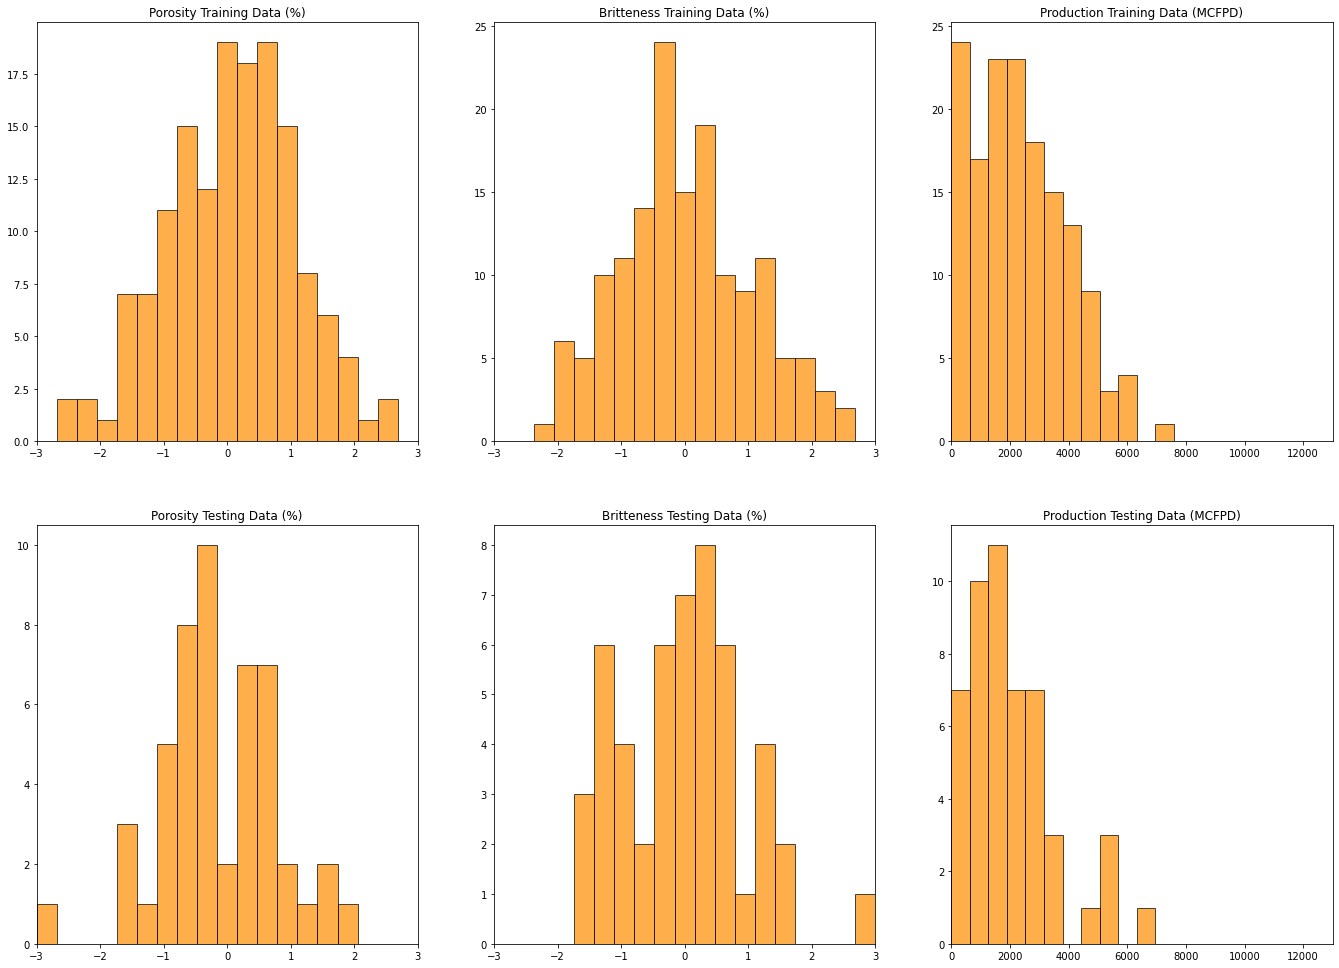

In [133]:
plt.subplot(231)
plt.hist(X_train["sPor"], alpha = 0.7, color = 'darkorange', edgecolor = 'black', bins=np.linspace(-3,3,20))
plt.title('Porosity Training Data (%)'); plt.xlim(-3,3)

plt.subplot(232)
plt.hist(X_train["sBrittle"], alpha = 0.7, color = 'darkorange', edgecolor = 'black', bins=np.linspace(-3,3,20))
plt.title('Britteness Training Data (%)'); plt.xlim(-3,3)

plt.subplot(233)
plt.hist(y_train['Prod'], alpha = 0.7, color = 'darkorange', edgecolor = 'black', bins=np.linspace(0,12000,20))
plt.title('Production Training Data (MCFPD)'); plt.xlim(prodmin,prodmax)

plt.subplot(234)
plt.hist(X_test["sPor"], alpha = 0.7, color = 'darkorange', edgecolor = 'black', bins=np.linspace(-3,3,20))
plt.title('Porosity Testing Data (%)'); plt.xlim(-3,3)

plt.subplot(235)
plt.hist(X_test["sBrittle"], alpha = 0.7, color = 'darkorange', edgecolor = 'black', bins=np.linspace(-3,3,20))
plt.title('Britteness Testing Data (%)'); plt.xlim(-3,3)

plt.subplot(236)
plt.hist(y_test['Prod'], alpha = 0.7, color = 'darkorange', edgecolor = 'black', bins=np.linspace(0,12000,20))
plt.title('Production Testing Data (MCFPD)'); plt.xlim(prodmin,prodmax)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.2, wspace=0.2, hspace=0.2)
plt.show()

The distributions are well behaved, we cannot observe obvious gaps nor truncations.  Let's look at a scatter plot of Porosity vs. Brittleness with points colored by Production.

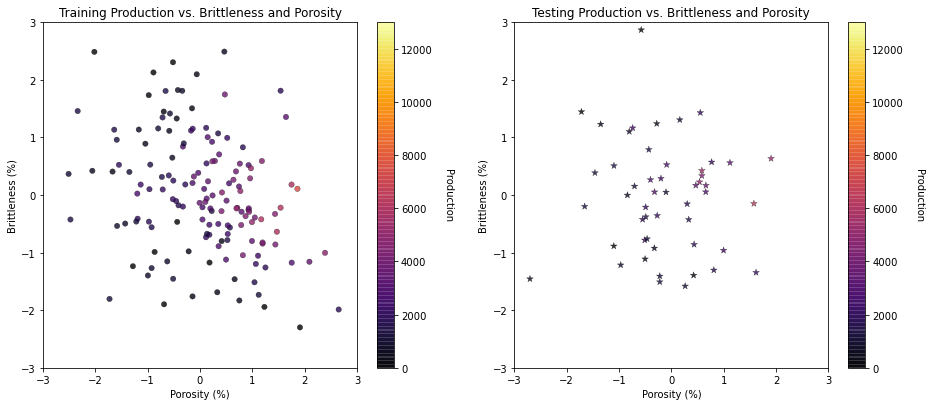

In [134]:
plt.subplot(121)
im = plt.scatter(X_train["sPor"],X_train["sBrittle"],s=30, c=y_train['Prod'], marker='o', norm=None, vmin=prodmin, vmax=prodmax, alpha=0.8, linewidths=0.3, edgecolors="black",cmap=cmap)
plt.title('Training Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
plt.xlim(-3,3); plt.ylim(-3,3)
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplot(122)
im = plt.scatter(X_test["sPor"],X_test["sBrittle"],s=50, c=y_test['Prod'], marker='*', norm=None, vmin=prodmin, vmax=prodmax, alpha=0.8, linewidths=0.3, edgecolors="black",cmap=cmap)
plt.title('Testing Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
plt.xlim(-3,3); plt.ylim(-3,3)
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

This problem looks complicated and could not be modeled with simple linear regression.  It appears there is a sweet spot for Brittleness and increasing Porosity is always beneficial for Production.

#### Play with a Variety of Machine Learning Models

Let's try out several machine learning prediction models to predict production with the porosity and brittleness data.

Here's our machine learning prediction model:

\begin{equation}
production = f(porosity,brittleness) + \epsilon
\end{equation}

We will show use the following models:

* multilinear regression [Lecture](https://www.youtube.com/watch?v=0fzbyhWiP84&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=21) 
* k-nearest nearbours [Lecture](https://www.youtube.com/watch?v=lzmeChSYvv8&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=30)
* decision tree [Lecture](https://www.youtube.com/watch?v=JUGo1Pu3QT4&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=38)
* random forest [Lecture](https://www.youtube.com/watch?v=m5_wk310fho&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=39)
* gradient boosting [Lecture](https://www.youtube.com/watch?v=___T8_ixIwc&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=40)

check out the links for lectures on my YouTube channel for each. 

* I have a lot of lectures available on machine learning in the Subsurface Machine Learning [Playlist](https://www.youtube.com/watch?v=5kBS5ThMHcU&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf) 

#### Instantiate, Fit and Predict with Linear Regression

Let's instantiate, fit and predict with a linear regression model.

Trying Out Hyperparameters:

* there are no hyperparameters to try out with linear regression, standard linear regression does not have an option to tune model complexity / flexibility
* changing the norm from L2 (not commonly done, but demonstrated [here](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/Interactive_Norms.ipynb)) changes sensitivity to the training data
* linear regression alternatives with hyperparamter tuning through regularization include:
    * Ridge Regression [Lecture](https://www.youtube.com/watch?v=pMGO40yXZ5Y&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=22)
    * LASSO [Lecture](https://www.youtube.com/watch?v=cVFYhlCCI_8&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=23)

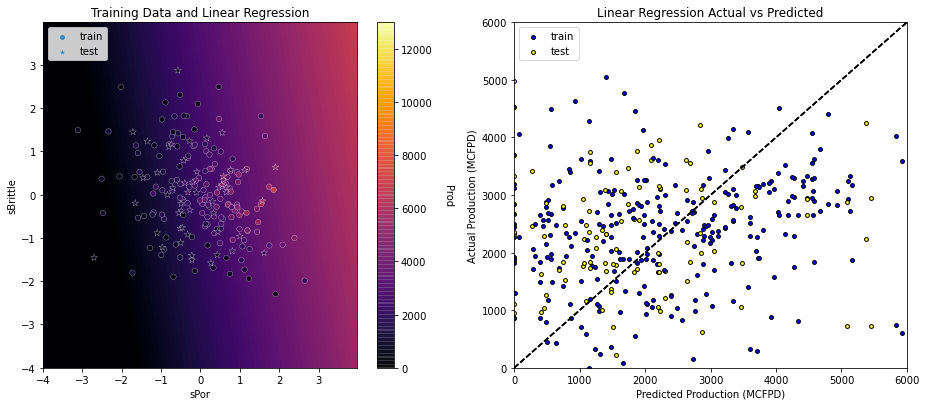

In [135]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()                                 # instantiate the prediction model
linear_fit = linear.fit(X_train,y_train['Prod'])            # train the model with the training data

plt.subplot(121)
visualize_model(linear_fit,X_train["sPor"],X_test["sPor"],-4,4,X_train["sBrittle"],X_test["sBrittle"],-4,4,y_train["Prod"],y_test["Prod"],prodmin,prodmax,'Training Data and Linear Regression')

plt.subplot(122)
cross_validation_plot(linear_fit,X_train,X_test,prodmin,prodmax,'Production','MCFPD','Linear Regression')

plt.scatter(y_train['Prod'],pred_train,color='blue',edgecolor='black',s=15,label='training'); plt.plot([0,6000],[0,6000],color='black',ls='--'); plt.xlim([0,6000]); plt.ylim([0,6000])
plt.scatter(y_test['Prod'],pred_test,color='yellow',edgecolor='black',s=15,label='testing'); plt.plot([0,6000],[0,6000],color='black',ls='--'); plt.xlim([0,6000]); plt.ylim([0,6000])
plt.xlabel('Predicted Production (MCFPD)'); plt.ylabel('Actual Production (MCFPD)'); plt.title('Linear Regression Actual vs Predicted')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Instantiate, Fit and Predict with $k$ Nearest Neighbour

Let's instantiate, fit and predict with a $k$ nearest neighbour model.

* instantiate it with the hyperparameters, $k$ nearest neighbours 

* train with the training data, we use the standard fit function from scikit learn 

Trying Out Hyperparameters:

* **k** - number of nearest training data to use for the estimate
* **low k** - high model complexity / flexibility
* **high k** - low model complexity / flexibility

Just change this line of code below:

```python
k = 5                                                       # hyperparameter
```

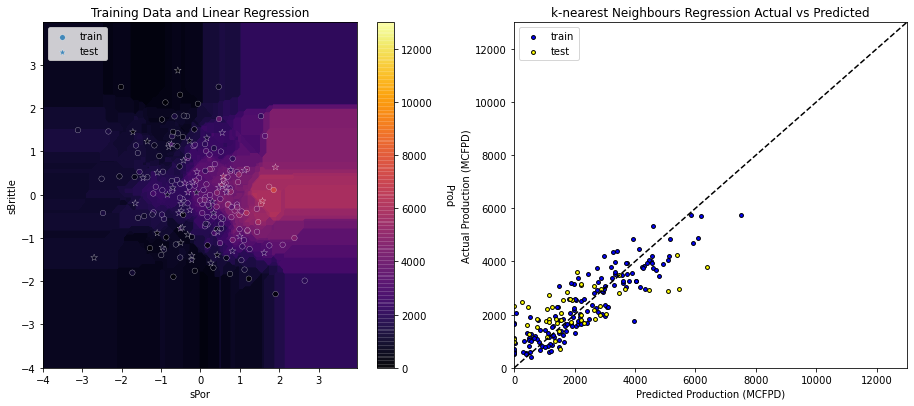

In [136]:
k = 5                                                       # hyperparameter
neigh = KNeighborsRegressor(weights = 'uniform', n_neighbors=k, p = 1) # instantiate the prediction model
neigh_fit = neigh.fit(X_train,y_train['Prod'])              # train the model with the training data

pred_train = linear_fit.predict(X_train); pred_test = linear_fit.predict(X_test)

plt.subplot(121)
visualize_model(neigh_fit,X_train["sPor"],X_test["sPor"],-4,4,X_train["sBrittle"],X_test["sBrittle"],-4,4,y_train["Prod"],y_test["Prod"],prodmin,prodmax,'Training Data and Linear Regression')

plt.subplot(122)
cross_validation_plot(neigh_fit,X_train,X_test,prodmin,prodmax,'Production','MCFPD','k-nearest Neighbours')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Instantiate, Fit and Predict with Decision Tree Regression

Let's instantiate, fit and predict with a decision tree regression model.

Trying Out Hyperparameters:

* **max_leaf_nodes** - maximum number of regions, terminal nodes, in the decision tree, low **max_lead_nodes** - low model complexity / flexibility
* **min_samples_leaf** - minimum number of training data in a regions, terminal nodes, in the decision tree, low **min_samples_leaf** - high model complexity / flexibility
* **max_depth** - maximum number of decision tree layers, low **max_depth** - low modelcomplexity / flexibility

Just change these lines of code below:

```python
max_leaf_nodes = 20                                       # hyperparameters
min_samples_leaf = 2
max_depth = 10
```

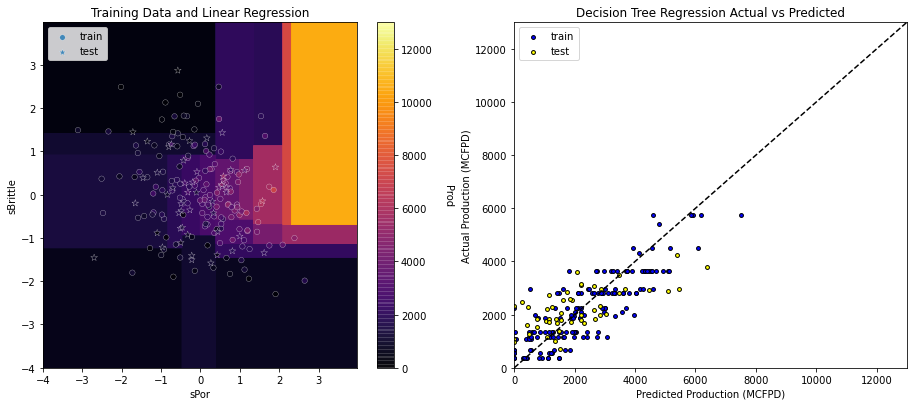

In [139]:
from sklearn import tree                                  # tree program from scikit learn (package for machine learning)

max_leaf_nodes = 10                                       # hyperparameters
min_samples_leaf = 2
max_depth = 10

plt.subplot(121)
visualize_model(tree_fit,X_train["sPor"],X_test["sPor"],-4,4,X_train["sBrittle"],X_test["sBrittle"],-4,4,y_train["Prod"],y_test["Prod"],prodmin,prodmax,'Training Data and Linear Regression')

plt.subplot(122)
cross_validation_plot(tree_fit,X_train,X_test,prodmin,prodmax,'Production','MCFPD','Decision Tree')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Instantiate, Fit and Predict with Tree-based Random Forest Regression

Let's instantiate, fit and predict with a random forest regression model.

Trying Out Hyperparameters:

* **max_depth** - maximum number of decision tree layers, low **max_depth** - low model complexity / flexibility

Other Model Hyperparameters:

* **n_estimators** - the number of decision trees to average to make the ensemble estimate
* **max_features** - number of features to randomly select for each decision, if 2 you will get tree bagging regression

Just change these lines of code below:

```python
max_depth = 10                                            # hyperparameters
n_estimators = 1000
max_features = 2
```

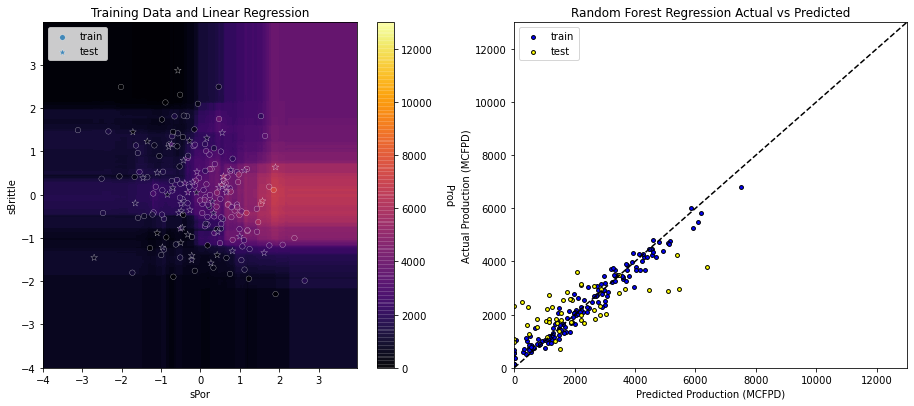

In [140]:
from sklearn.ensemble import RandomForestRegressor        # tree program from scikit learn (package for machine learning)

max_depth = 10                                            # hyperparameters
n_estimators = 1000
max_features = 2

forest = RandomForestRegressor(max_depth=max_depth, random_state=73073,n_estimators=n_estimators, max_features=max_features)

forest_fit = forest.fit(X_train,y_train['Prod'])          # train the model with training data 

plt.subplot(121)
visualize_model(forest_fit,X_train["sPor"],X_test["sPor"],-4,4,X_train["sBrittle"],X_test["sBrittle"],-4,4,y_train["Prod"],y_test["Prod"],prodmin,prodmax,'Training Data and Linear Regression')

plt.subplot(122)
cross_validation_plot(forest_fit,X_train,X_test,prodmin,prodmax,'Production','MCFPD','Random Forest')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Instantiate, Fit and Predict with Tree-based Gradient Boosting Regression

Let's instantiate, fit and predict with a tree-based gradient boosting regression model.

Trying Out Hyperparameters:

* **loss** - the loss function, 'ls' for least squares, L2 norm solution
* **max_depth** - maximum number of decision tree layers, low **max_depth** - low model complexity / flexibility for each additive model for less ability to capture feature interactions and slower learning 
* **learning_rate** - too fast and the solution may be unstable, diverge, and too slow and the solution make take too long

Just change these lines of code below:

```python
params = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth of each tree
    'learning_rate': 0.003,                                 # learning learning
    'criterion': 'mse'                                      # individual tree loss
}
```

Note, the above is a dictionary, a convenient Python class to flexibly store information, like the model hyperparameters.

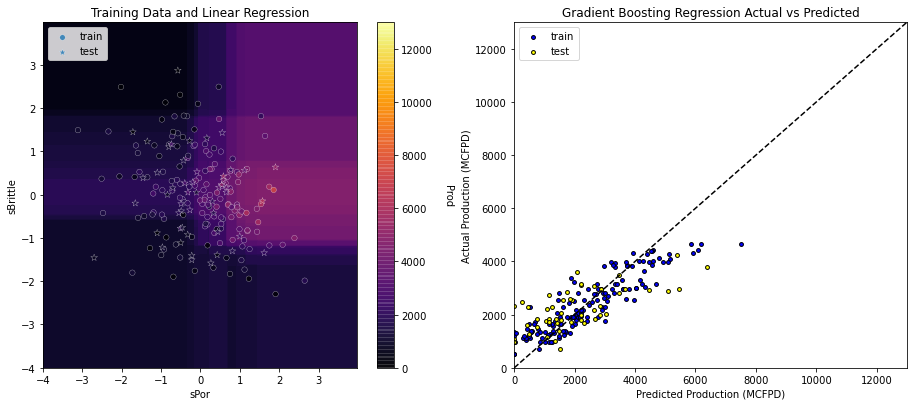

In [141]:
from sklearn.ensemble import GradientBoostingRegressor      # tree-based gradient boosting

params = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth of each tree
    'learning_rate': 0.003,                                 # constraint on magnitude of update with each estimator / for slow, robust learning
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

gb = GradientBoostingRegressor(n_estimators=1000,**params)  # instantiate the prediction model
gb_fit = gb.fit(X_train,y_train['Prod'])                    # train the model with the training data

plt.subplot(121)
visualize_model(gb_fit,X_train["sPor"],X_test["sPor"],-4,4,X_train["sBrittle"],X_test["sBrittle"],-4,4,y_train["Prod"],y_test["Prod"],prodmin,prodmax,'Training Data and Linear Regression')

plt.subplot(122)
cross_validation_plot(gb_fit,X_train,X_test,prodmin,prodmax,'Production','MCFPD','Gradient Boosting')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Summary

Let's look at all the models together for a visual comparison.

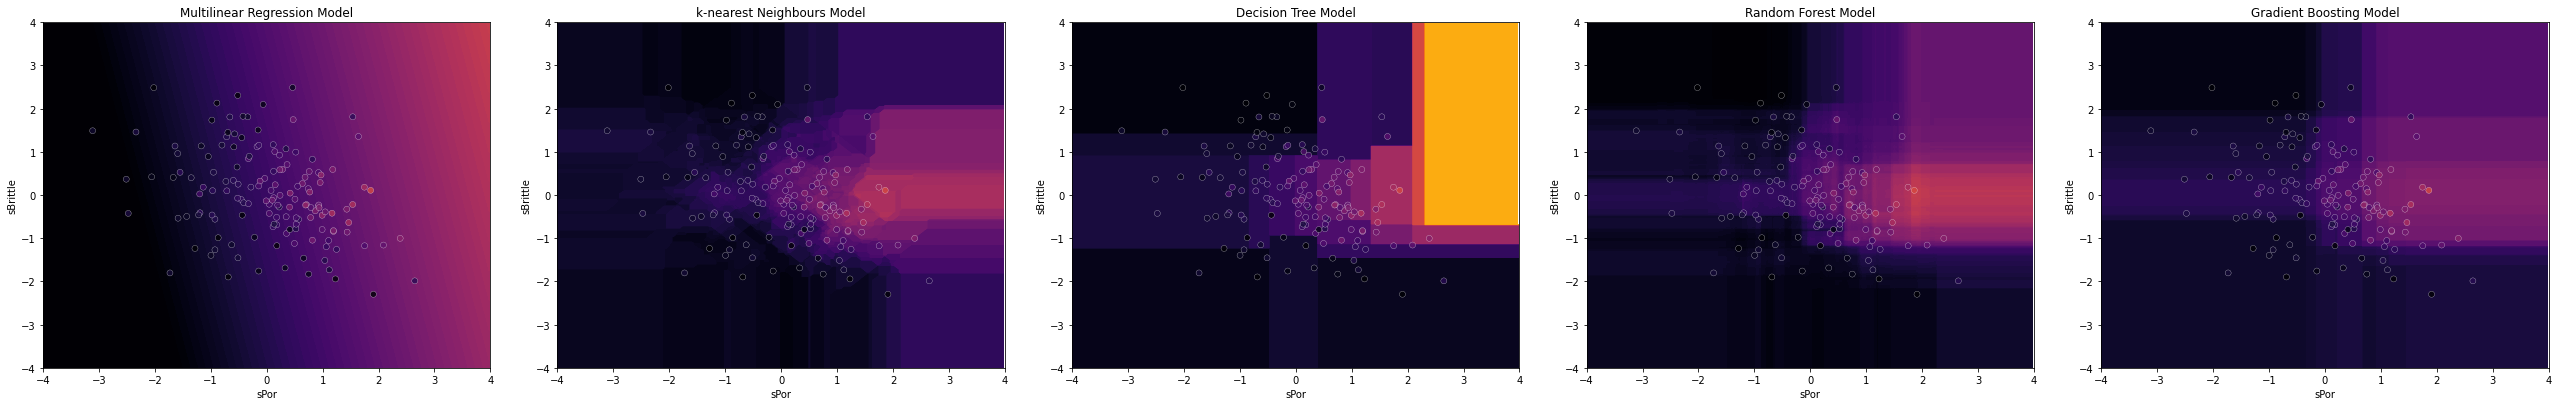

In [142]:
from matplotlib import gridspec
fig = plt.figure(constrained_layout=False)
gs = gridspec.GridSpec(1,5, figure=fig) 

visualize_model_sub(plt.subplot(gs[0]),linear_fit,X_train["sPor"],-4,4,X_train["sBrittle"],-4,4,y_train["Prod"],prodmin,prodmax,'Multilinear Regression Model',legend=False)

visualize_model_sub(plt.subplot(gs[1]),neigh_fit,X_train["sPor"],-4,4,X_train["sBrittle"],-4,4,y_train["Prod"],prodmin,prodmax,'k-nearest Neighbours Model',legend=False)

visualize_model_sub(plt.subplot(gs[2]),tree_fit,X_train["sPor"],-4,4,X_train["sBrittle"],-4,4,y_train["Prod"],prodmin,prodmax,'Decision Tree Model',legend=False)

visualize_model_sub(plt.subplot(gs[3]),forest_fit,X_train["sPor"],-4,4,X_train["sBrittle"],-4,4,y_train["Prod"],prodmin,prodmax,'Random Forest Model',legend=False)

visualize_model_sub(plt.subplot(gs[4]),gb_fit,X_train["sPor"],-4,4,X_train["sBrittle"],-4,4,y_train["Prod"],prodmin,prodmax,'Gradient Boosting Model',legend=False)

plt.subplots_adjust(left=0.0, bottom=0.0, right=5.8, top=1.2, wspace=0.15, hspace=0.2)

fig.savefig('Multiple_ML_Models.jpg',dpi = 400, bbox_inches = 'tight')

plt.show()

#### Comments

This is provided for an opportunity to try out a variety of machine learning models.

* no effort was made to tune hyperparameters / test the models with withheld testing data

* but, I hope this was an opportunity to quickly try out a variety of machine learning models

I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.


***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
